In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import tensorflow as tfm
if tfm.test.gpu_device_name():
  print (f'Se encontró el siguientr GPU: {tfm.test.gpu_device_name()}')
else:
  print('Aqui no hay GPU´s')

Se encontró el siguientr GPU: /device:GPU:0


In [4]:
encodings = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/DisneylandReviews.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading the file with encoding:", encoding)
df.head()


Error reading the file with encoding: utf-8
File read successfully with encoding: ISO-8859-1


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df['Reviewer_Location'].value_counts()

United States     14545
United Kingdom     9751
Australia          4677
Canada             2234
India              1511
                  ...  
Namibia               1
Armenia               1
Timor-Leste           1
South Sudan           1
Åland Islands         1
Name: Reviewer_Location, Length: 162, dtype: int64

In [9]:
df['Reviewer_Location'].unique()

array(['Australia', 'Philippines', 'United Arab Emirates',
       'United Kingdom', 'Singapore', 'India', 'Malaysia',
       'United States', 'Canada', 'Myanmar (Burma)', 'Hong Kong', 'China',
       'Indonesia', 'Qatar', 'New Zealand', 'Sri Lanka', 'Uganda',
       'Thailand', 'Austria', 'South Africa', 'Saudi Arabia', 'Japan',
       'Israel', 'South Korea', 'Turkey', 'Macau', 'Egypt', 'Mexico',
       'Mauritius', 'Sweden', 'Brazil', 'Kenya', 'Vietnam', 'Portugal',
       'Cambodia', 'Zambia', 'Croatia', 'France', 'Taiwan', 'Oman',
       'Colombia', 'Norway', 'Kuwait', 'Netherlands', 'Barbados',
       'Finland', 'Bosnia and Herzegovina', 'Brunei', 'Bahrain',
       'Maldives', 'Ireland', 'Russia', 'Romania',
       'Northern Mariana Islands', 'Germany', 'Chile', 'Isle of Man',
       'Pakistan', 'Ukraine', 'Greece', 'Switzerland', 'Spain', 'Estonia',
       "Côte d'Ivoire", 'Guam', 'Bangladesh', 'Belgium', 'Italy',
       'Botswana', 'Denmark', 'Argentina', 'Peru', 'Lithuania', 'I

In [10]:
df['Rating'].value_counts()

5    23140
4    10771
3     5107
2     2127
1     1499
Name: Rating, dtype: int64

In [11]:
import re
import nltk
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def preprocesamiento_texto(texto):

    # haces todo el texto en minúsculas
    texto=texto.lower()

    # regex para caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)

    # tokenizar el texto
    texto_tokenized= word_tokenize(texto)

    # eliminar stopwords
    texto_no_stop = [token for token in texto_tokenized if token not in stop_words_en]

    # lematizar/unir las palabras procesadas nuevamente en una cadena
    final= [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final=' '.join(final)

    return final

In [13]:
df['texto_limpio'] = df['Review_Text'].apply(preprocesamiento_texto)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...


In [14]:
df.drop(df[df['Year_Month'] == 'missing'].index, inplace=True)

In [15]:
def sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [16]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...,Positive
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...,Positive
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...,Positive
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...,Positive
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...,Positive


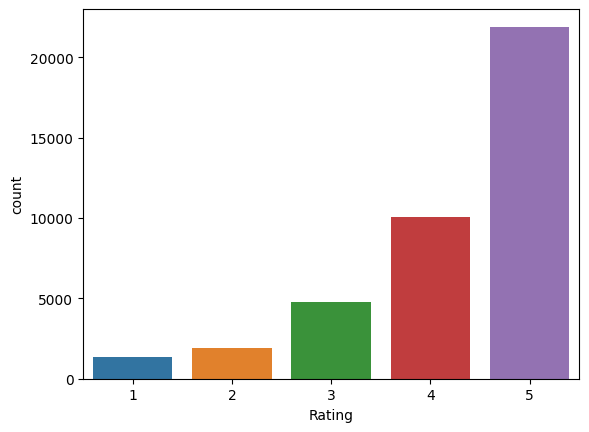

In [17]:
sns.countplot(x=df['Rating'])
plt.show()

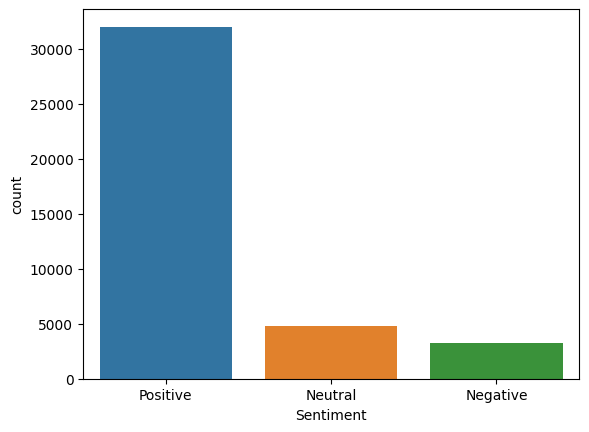

In [18]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [19]:
pos = df[df['Sentiment'] == 'Positive'].sample(4500)
neg = df[df['Sentiment'] == 'Negative'].sample(3000)
neu = df[df['Sentiment'] == 'Neutral'].sample(3800)

df = pd.concat([pos,neg,neu],axis=0)
df.shape

(11300, 8)

In [20]:
df['Branch'].value_counts()

Disneyland_California    4483
Disneyland_Paris         4310
Disneyland_HongKong      2507
Name: Branch, dtype: int64

In [21]:
new = df["Year_Month"].str.split("-", n = 1, expand = True)

df["Year"]= new[0]
df["Month"]= new[1]


In [22]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,texto_limpio,Sentiment,Year,Month
41931,116354203,5,2011-8,United Kingdom,This is our second time at Disneyland paris. M...,Disneyland_Paris,second time disneyland paris husband two child...,Positive,2011,8
31452,520488182,5,2017-9,United Kingdom,We had a lovely couple of days walking around ...,Disneyland_Paris,lovely couple day walking around trying sidesh...,Positive,2017,9
31038,544974228,5,2017-11,United Kingdom,Just returned from 4 days 3 nights at Disney P...,Disneyland_Paris,returned day night disney paris start parkmagi...,Positive,2017,11
23664,173337125,4,2013-6,United States,There were 12 of us on this trip and we had so...,Disneyland_California,u trip much fun although long line expected pa...,Positive,2013,6
5635,297042778,5,2015-8,New Zealand,One of the better Disneyland's! One thing I lo...,Disneyland_HongKong,one better disneyland one thing love one see p...,Positive,2015,8


In [23]:
df['Year'] = df['Year'].astype(int)

REVIEWS PER YEAR

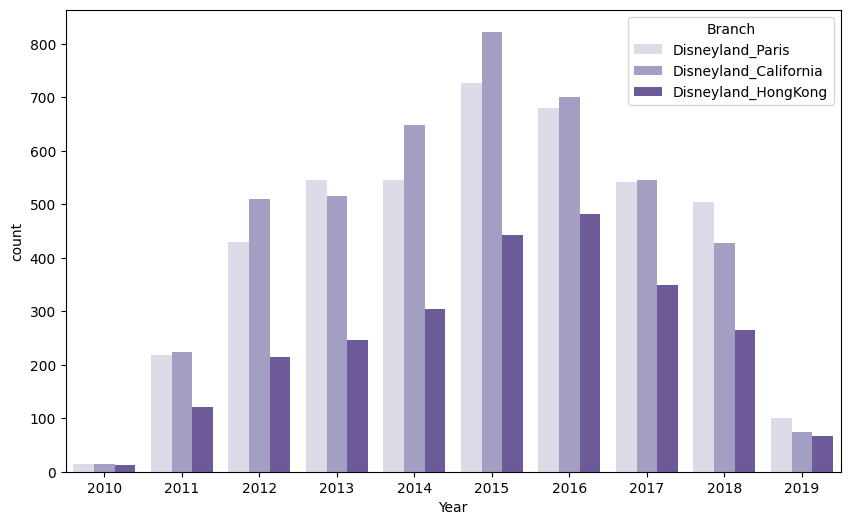

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Year',hue='Branch',palette='Purples');

REVIEWS PER COUNTRY

In [25]:
import plotly.express as px
fig_df=df.groupby('Reviewer_Location',as_index=False).agg({'Branch':'count'}).sort_values('Branch',ascending=False)
fig = px.choropleth(fig_df,
                    locations='Reviewer_Location', locationmode='country names',
                    color='Branch',
                    color_continuous_scale="portland", hover_data=['Branch'],
                    title='Country - Reviews')
fig.update(layout_coloraxis_showscale=False)
fig.show();

In [26]:
df4 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
df4.style.background_gradient(cmap="autumn", subset=['Rating'])

,Reviewer_Location,Rating
50,Isle of Man,1.000000
105,Tanzania,1.000000
72,Nepal,1.000000
68,Mongolia,1.000000
91,Serbia,1.500000
108,Tunisia,1.500000
98,South Sudan,2.000000
75,Nigeria,2.000000
69,Montenegro,2.000000
67,Moldova,2.000000


SENTIMENTS PER PARK

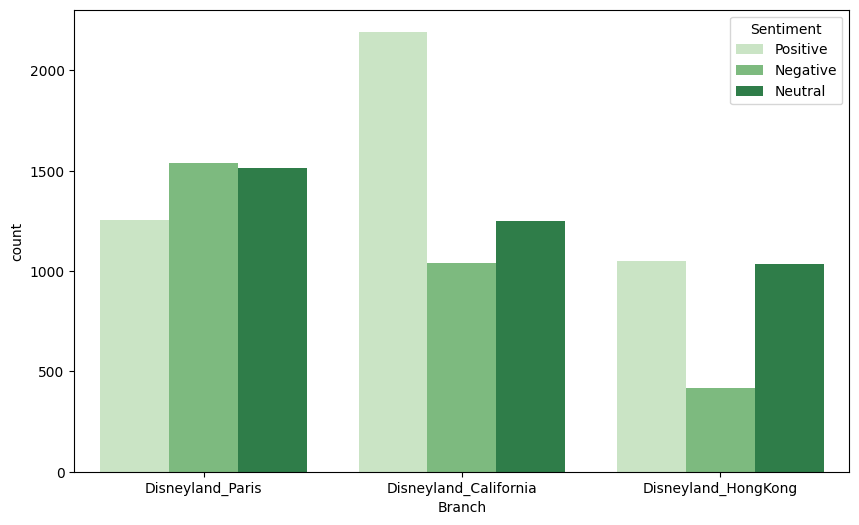

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='Sentiment',palette='Greens');

SENTIMENT PERCENTAGE PER PARK

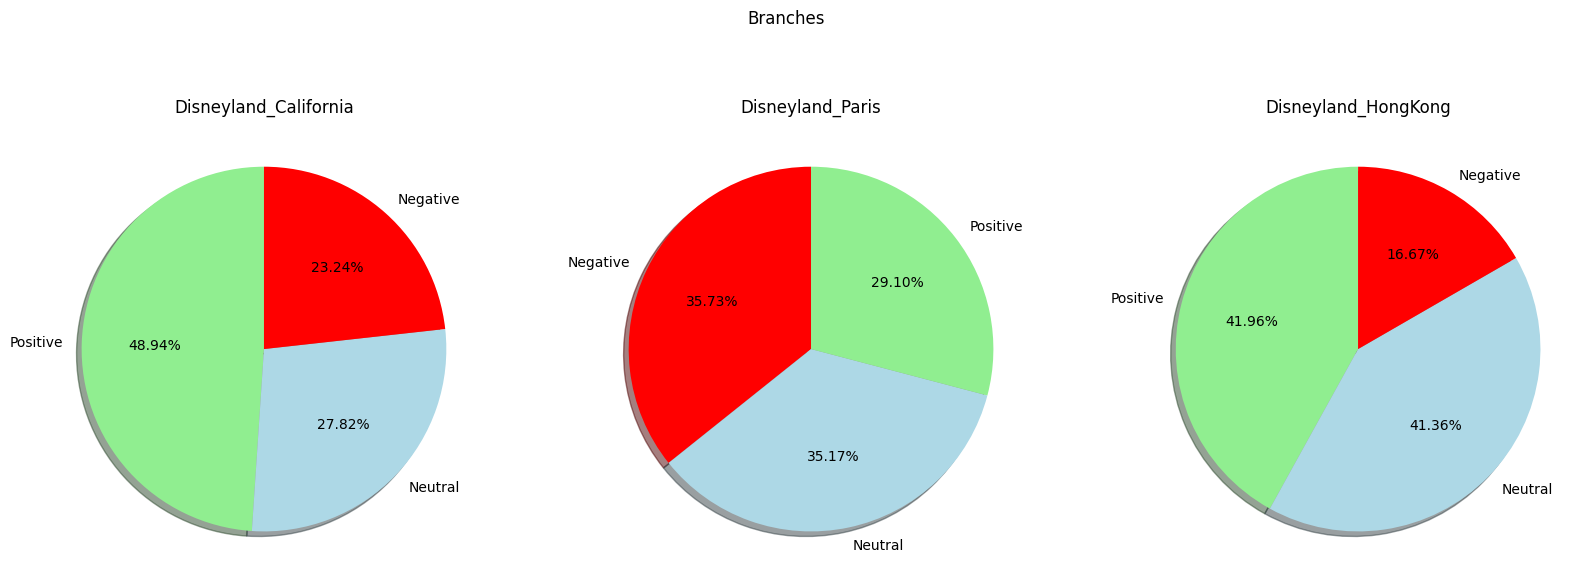

In [28]:
sentiment_colors = {'Positive': 'lightgreen', 'Neutral': 'lightblue', 'Negative': 'red'}

branches = ['Disneyland_California', 'Disneyland_Paris', 'Disneyland_HongKong']

fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
fig.suptitle('Branches')

for i, branch in enumerate(branches):
    df_branch = df[df['Branch'] == branch]
    labels = df_branch['Sentiment'].value_counts(sort=True).index
    sizes = df_branch['Sentiment'].value_counts(sort=True)

    colors = [sentiment_colors[sentiment] for sentiment in labels]

    axes[i].pie(sizes, labels=labels, startangle=90, shadow=1, autopct='%1.2f%%', colors=colors)
    axes[i].set_title(branch)

plt.show()
